# PLOT THE MONTHLY NUMBER OF SEARCHES FOR FLIGHTS ARRIVING AT MALAGA, MADRID OR BARCELONA

In [1]:
import pandas as pd
import bz2


In [2]:
pwd

'/Users/cortinas/Documents/DSchallenge/dschallenge'

In [3]:
ls -lrt

total 15510272
-rw-r--r--@ 1 cortinas  staff         679 Jun 11 18:33 README.md
-rw-r--r--  1 cortinas  staff  4244874509 Jun 11 18:54 bookings.csv
-rw-r--r--  1 cortinas  staff  3696229366 Jun 11 18:57 searches.csv
-rw-r--r--@ 1 cortinas  staff         639 Jun 15 21:29 top_10_airports.csv
-rw-r--r--  1 cortinas  staff       32622 Jun 15 21:39 exercise3.ipynb
-rw-r--r--  1 cortinas  staff       21907 Jun 15 21:40 exercise1.ipynb
-rw-r--r--  1 cortinas  staff       85887 Jun 15 21:40 exercise2.ipynb


# 1 -DATA EXPLORATORY
====================================

In [30]:
searches = pd.read_csv ('searches.csv', sep = '^', nrows = 100000)

In [31]:

searches.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [7]:
searches.isnull().sum()

Date                   0
Time                   0
TxnCode                0
OfficeID               0
Country                0
Origin                 0
Destination            0
RoundTrip              0
NbSegments             0
Seg1Departure          0
Seg1Arrival            0
Seg1Date               4
Seg1Carrier          626
Seg1BookingCode      920
Seg2Departure        288
Seg2Arrival          288
Seg2Date             292
Seg2Carrier          741
Seg2BookingCode      934
Seg3Departure        964
Seg3Arrival          964
Seg3Date             964
Seg3Carrier          964
Seg3BookingCode      965
Seg4Departure        970
Seg4Arrival          970
Seg4Date             970
Seg4Carrier          970
Seg4BookingCode      971
Seg5Departure        995
Seg5Arrival          995
Seg5Date             995
Seg5Carrier          995
Seg5BookingCode      995
Seg6Departure        997
Seg6Arrival          997
Seg6Date             997
Seg6Carrier          997
Seg6BookingCode      997
From                  11


In [32]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [33]:

searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'], nrows = 100000)

In [34]:
searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [35]:

searches = searches.dropna()

# 2 -DATA NORMALIZATION
=========================================

# 3 - STRATEGY TO FOLLOW
=========================================

## 3.1 Test in small sample

     To know city codes
     Get data filtering by MAD , AGP and BCN
     Grouping by month
     Grouping by airport and month
     Sum
     Plot
     
## 3.2 Consolidate the previous process but in "bigdata"

In [10]:
from neobase import NeoBase

In [11]:
geo_a = NeoBase()

In [10]:
madrid_code = geo_a.find_with('Madrid','name')
print (madrid_code)

<generator object NeoBase.find_with at 0x7fce45c4f5f0>


## 3.1 Testing steps in small sample

### Identify city codes and testing in "searches" data

In [36]:
searches = searches.loc[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])]
searches.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


### Grouping per month

In [37]:
searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'], nrows = 100000)
searches=searches.dropna()
searches= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])]

In [38]:
searches.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [39]:
searches['Year-Month']=searches['Date'].str[0:7]

In [40]:
searches.head()

,Date,Destination,Year-Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [41]:
searches.drop('Date', axis = 1, inplace = True)
searches.head()

,Destination,Year-Month
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


In [42]:
searches['Destination'] = searches ['Destination'].str.strip()


In [43]:
searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'], nrows = 100000)
searches=searches.dropna()
searchFilter= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])].copy()
searchFilter['Year-Month']=searchFilter['Date'].str[0:7]
searchFilter.drop('Date', axis = 1, inplace = True)

In [20]:
searchFilter.head()


,Destination,Year-Month
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


In [56]:
searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'], nrows = 100)
searches=searches.dropna()
searchFilter= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])].copy()
searchFilter['Year-Month']=searchFilter['Date'].str[0:7]
searchFilter.drop('Date', axis = 1, inplace = True)
searchFilter_gr= searchFilter.groupby(['Year-Month', 'Destination'])

In [57]:
searchFilter_gr.groups

{('2013-01', 'AGP'): [93], ('2013-01', 'MAD'): [4]}

In [69]:

searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'], nrows = 100000)
searches=searches.dropna()
searchFilter= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])].copy()
searchFilter['Year-Month']=searchFilter['Date'].str[0:7]
searchFilter.drop('Date', axis = 1, inplace = True)
searchFilter_gr= searchFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()

In [70]:
searchFilter_gr.head()

,Year-Month,Destination,index
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497


In [47]:
searchFilter_gr.rename (columns = {'index' : 'Num_Searches'}, inplace = True)

In [48]:
searchFilter_gr.head()

,Year-Month,Destination,Num_Searches
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497


Quick check plotting a sample using %pylab, just testing, without need to import numpy+matplotlib yet

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
df_tst=searchFilter_gr.pivot('Year-Month', 'Destination', 'Num_Searches')

In [51]:
df_tst.head()

Destination,AGP,BCN,MAD
Year-Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


<AxesSubplot:xlabel='Year-Month'>

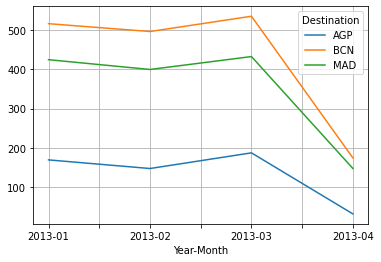

In [52]:
df_tst.plot(grid= True)

<AxesSubplot:xlabel='Year-Month'>

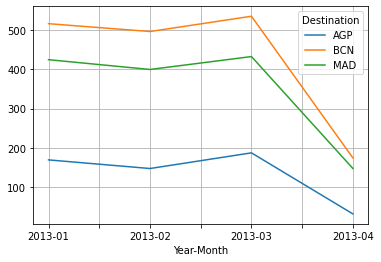

In [53]:
df_tst.plot(grid= True, legend = True)

## 3.2 Consolidate the previous process but in "bigdata"

Chunk test

In [78]:
searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'],\
                 chunksize= 600000)

results = pd.DataFrame()

for i, chunk in enumerate (searches):
    print ("Chunk: %d, size of chunk %d"%(i+1, len(chunk)))
    searches= chunk.dropna()
    searchFilter= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])].copy()
    searchFilter['Year-Month']=searchFilter['Date'].str[0:7]
    searchFilter.drop('Date', axis = 1, inplace = True)
    searchFilter_gr= searchFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
    results=all_results.append(searchFilter_gr)
searchFilter_gr.head()

Chunk: 1, size of chunk 600000
Chunk: 2, size of chunk 600000
Chunk: 3, size of chunk 600000
Chunk: 4, size of chunk 600000
Chunk: 5, size of chunk 600000
Chunk: 6, size of chunk 600000
Chunk: 7, size of chunk 600000
Chunk: 8, size of chunk 600000
Chunk: 9, size of chunk 600000
Chunk: 10, size of chunk 600000
Chunk: 11, size of chunk 600000
Chunk: 12, size of chunk 600000
Chunk: 13, size of chunk 600000
Chunk: 14, size of chunk 600000
Chunk: 15, size of chunk 600000
Chunk: 16, size of chunk 600000
Chunk: 17, size of chunk 600000
Chunk: 18, size of chunk 600000
Chunk: 19, size of chunk 600000
Chunk: 20, size of chunk 600000
Chunk: 21, size of chunk 600000
Chunk: 22, size of chunk 600000
Chunk: 23, size of chunk 600000
Chunk: 24, size of chunk 600000
Chunk: 25, size of chunk 600000
Chunk: 26, size of chunk 600000
Chunk: 27, size of chunk 600000
Chunk: 28, size of chunk 600000
Chunk: 29, size of chunk 600000
Chunk: 30, size of chunk 600000
Chunk: 31, size of chunk 600000
Chunk: 32, size o

,Year-Month,Destination,index
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,168
4,2013-02,BCN,578


In [79]:
results_gr = all_results.groupby(['Year-Month', 'Destination']).sum().reset_index()

In [80]:
results_gr.head()

,Year-Month,Destination,index
0,2013-01,AGP,9633
1,2013-01,BCN,29469
2,2013-01,MAD,24258
3,2013-02,AGP,8379
4,2013-02,BCN,28329


In [81]:
import seaborn as sns

In [82]:
results_gr.rename (columns = {'index': 'Num_Searches'}, inplace=True)

Text(0.5, 1.0, 'Monthly searches for flights arriving at Malaga, Madrid and Barcelona')

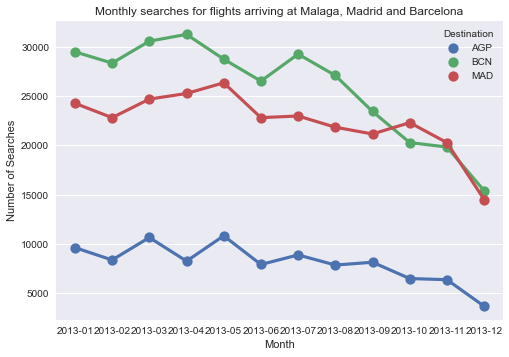

In [88]:

ax=sns.pointplot (x= 'Year-Month', y= 'Num_Searches', hue='Destination' ,data=results_gr)
ax.set(xlabel ='Month', ylabel='Number of Searches');
ax.figure.savefig('output.png')
ax.set_title("Monthly searches for flights arriving at Malaga, Madrid and Barcelona")

# FINAL CODE 

Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 1000000
Chunk: 12, size of chunk 1000000
Chunk: 13, size of chunk 1000000
Chunk: 14, size of chunk 1000000
Chunk: 15, size of chunk 1000000
Chunk: 16, size of chunk 1000000
Chunk: 17, size of chunk 1000000
Chunk: 18, size of chunk 1000000
Chunk: 19, size of chunk 1000000
Chunk: 20, size of chunk 1000000
Chunk: 21, size of chunk 390198
Below chart has been saved in your home folder


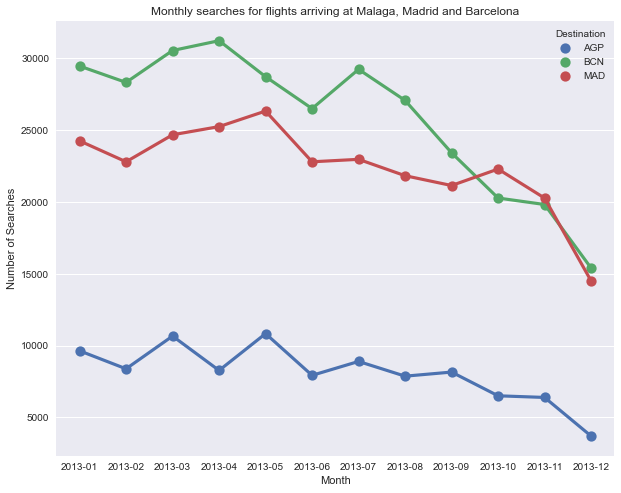

In [89]:
#import libraries

import seaborn as sns
import pandas as pd
import bz2

# Chunk process reading "big data" and grouping by requested cities

searches = pd.read_csv ('searches.csv', sep = '^', usecols = ['Destination', 'Date'],\
                 chunksize= 1000000)

results = pd.DataFrame()

for i, chunk in enumerate (searches):
    print ("Chunk: %d, size of chunk %d"%(i+1, len(chunk)))
    searches= chunk.dropna()
    searchFilter= searches[searches['Destination'].isin (['MAD', 'BCN', 'AGP'])].copy()
    searchFilter['Year-Month']=searchFilter['Date'].str[0:7]
    searchFilter.drop('Date', axis = 1, inplace = True)
    searchFilter_gr= searchFilter.reset_index().groupby(['Year-Month', 'Destination']).count().reset_index()
    results=results.append(searchFilter_gr)

all_results_gr = all_results.groupby(['Year-Month', 'Destination']).sum().reset_index()
all_results_gr.rename (columns = {'index' : 'Num_Searches'}, inplace = True)

#Plotting with seaborn

plt.style.use('seaborn')
fig, ax=plt.subplots(figsize=(10,8))

ax=sns.pointplot (x= 'Year-Month', y= 'Num_Searches', hue = 'Destination', data=all_results_gr)
ax.set(xlabel ='Month', ylabel='Number of Searches')
ax.set_title("Monthly searches for flights arriving at Malaga, Madrid and Barcelona")

#Exporting chart to file
ax.figure.savefig('output.png')

print ("Below chart has been saved in your home folder")